For detailed discussion about logistic regression, please visit my blog -->

# Import Necessary Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_squared_error, r2_score, mean_absolute_error
)
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import graphviz
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [26]:
# random seed for reproducibility
np.random.seed(42)

# plotting style
plt.style.use('ggplot')
sns.set(style='whitegrid')

# 1. Classification using Decision Trees

### 1.1 Data Preparation and Exploration



In [27]:
# Load the Iris dataset
iris = load_iris()
X_cls = pd.DataFrame(iris.data, columns=iris.feature_names)
y_cls = pd.Series(iris.target, name='species')
y_cls_names = pd.Series([iris.target_names[i] for i in iris.target], name='species_name')

# Display basic dataset information
print("\n--- Classification Dataset: Iris ---")
print(f"Dataset shape: {X_cls.shape}")
print(f"Features: {', '.join(iris.feature_names)}")
print(f"Target classes: {', '.join(iris.target_names)}")


--- Classification Dataset: Iris ---
Dataset shape: (150, 4)
Features: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
Target classes: setosa, versicolor, virginica


In [28]:
# Exploring the dataset
print("\nData Sample:")
display(pd.concat([X_cls, y_cls_names], axis=1).head())

print("\nFeature Statistics:")
display(X_cls.describe())

print("\nClass Distribution:")
class_counts = y_cls_names.value_counts()
display(class_counts)


Data Sample:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Feature Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Class Distribution:


,count
species_name,
setosa,50
versicolor,50
virginica,50


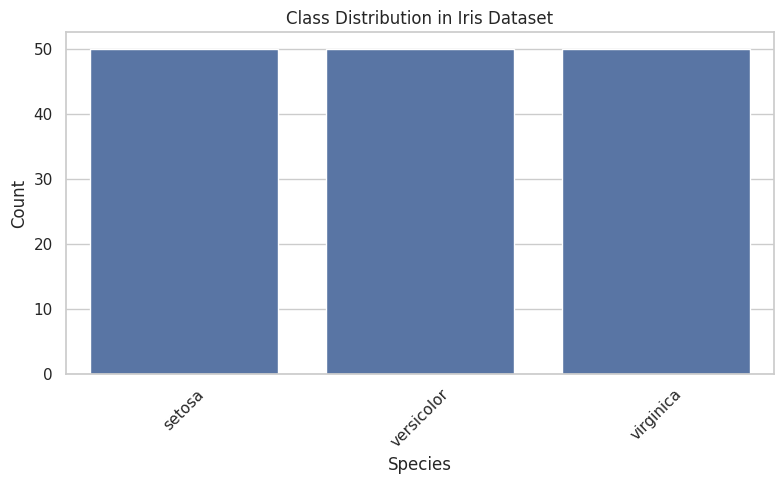

In [29]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_cls_names)
plt.title('Class Distribution in Iris Dataset')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

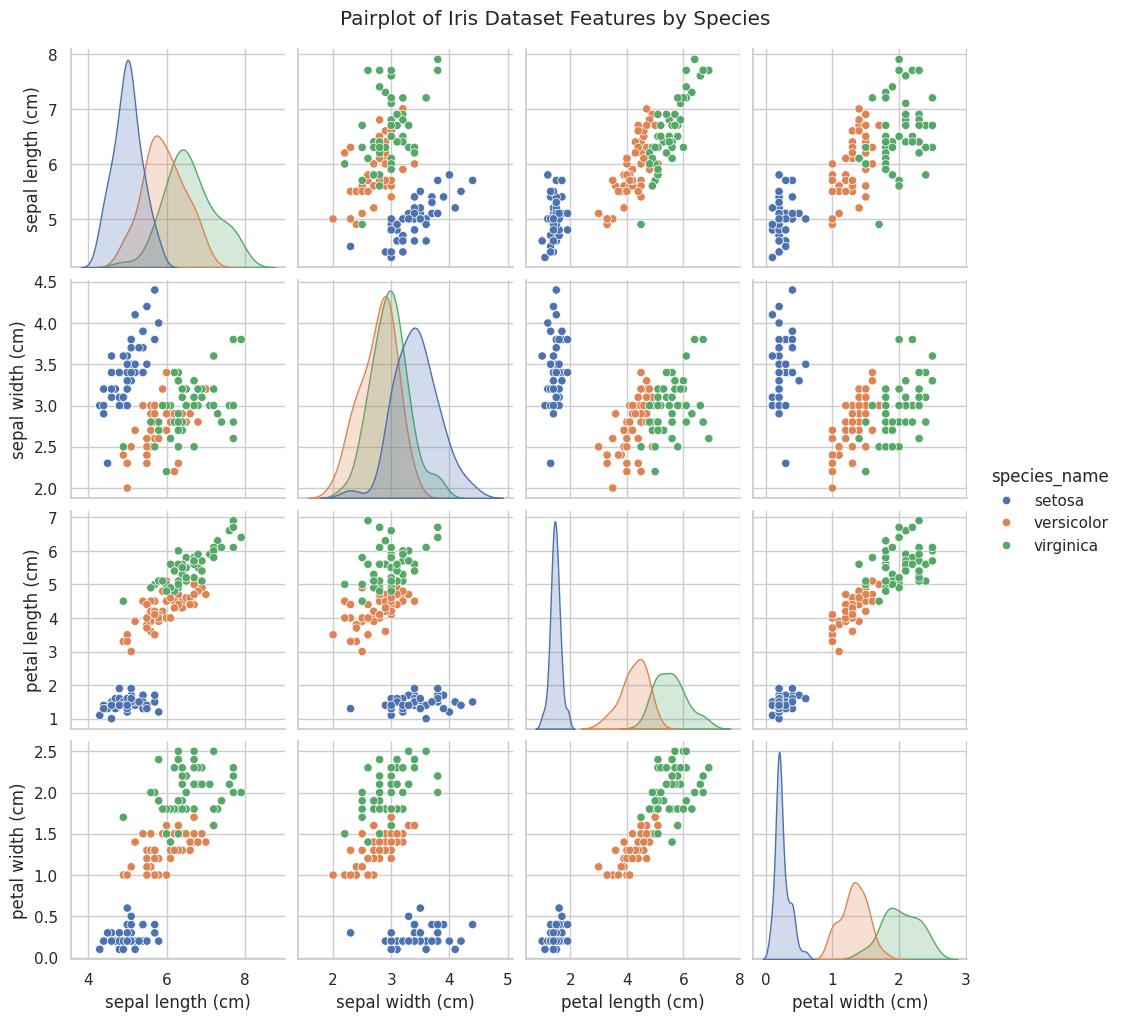

In [30]:
# Pairplot to visualize feature relationships by class
plt.figure(figsize=(12, 10))
sns.pairplot(pd.concat([X_cls, y_cls_names], axis=1), hue='species_name')
plt.suptitle('Pairplot of Iris Dataset Features by Species', y=1.02)
plt.show()

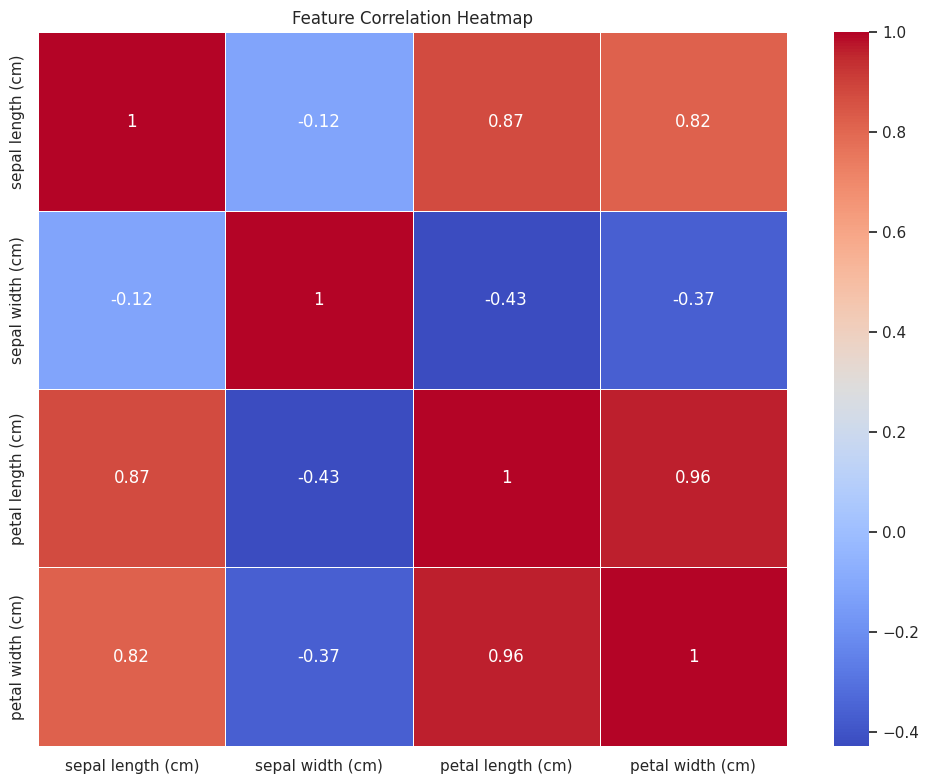

In [31]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_cls.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [32]:
# Split the data into training and testing sets
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(
    X_cls, y_cls, test_size=0.3, random_state=42, stratify=y_cls
)

print(f"\nTraining set shape: {X_cls_train.shape}")
print(f"Testing set shape: {X_cls_test.shape}")


Training set shape: (105, 4)
Testing set shape: (45, 4)


### 1.2 Model Training

In [33]:
# Create and train a decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_cls_train, y_cls_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# Make predictions
y_cls_pred = dt_clf.predict(X_cls_test)

In [35]:
# Evaluate the model
cls_accuracy = accuracy_score(y_cls_test, y_cls_pred)
print(f"\nClassification Accuracy: {cls_accuracy:.4f}")

print("\nClassification Report:")
cls_report = classification_report(y_cls_test, y_cls_pred, target_names=iris.target_names)
print(cls_report)


Classification Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45





### 1.3 Visualization and Interpretation

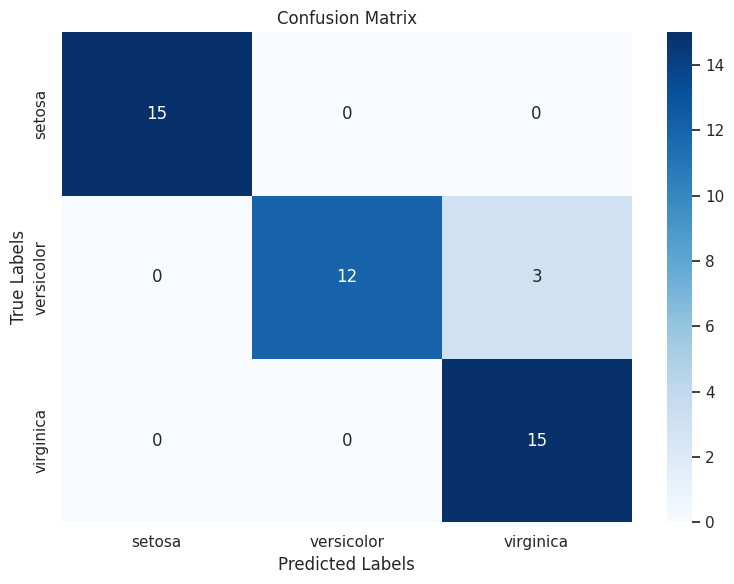

In [36]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_cls_test, y_cls_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

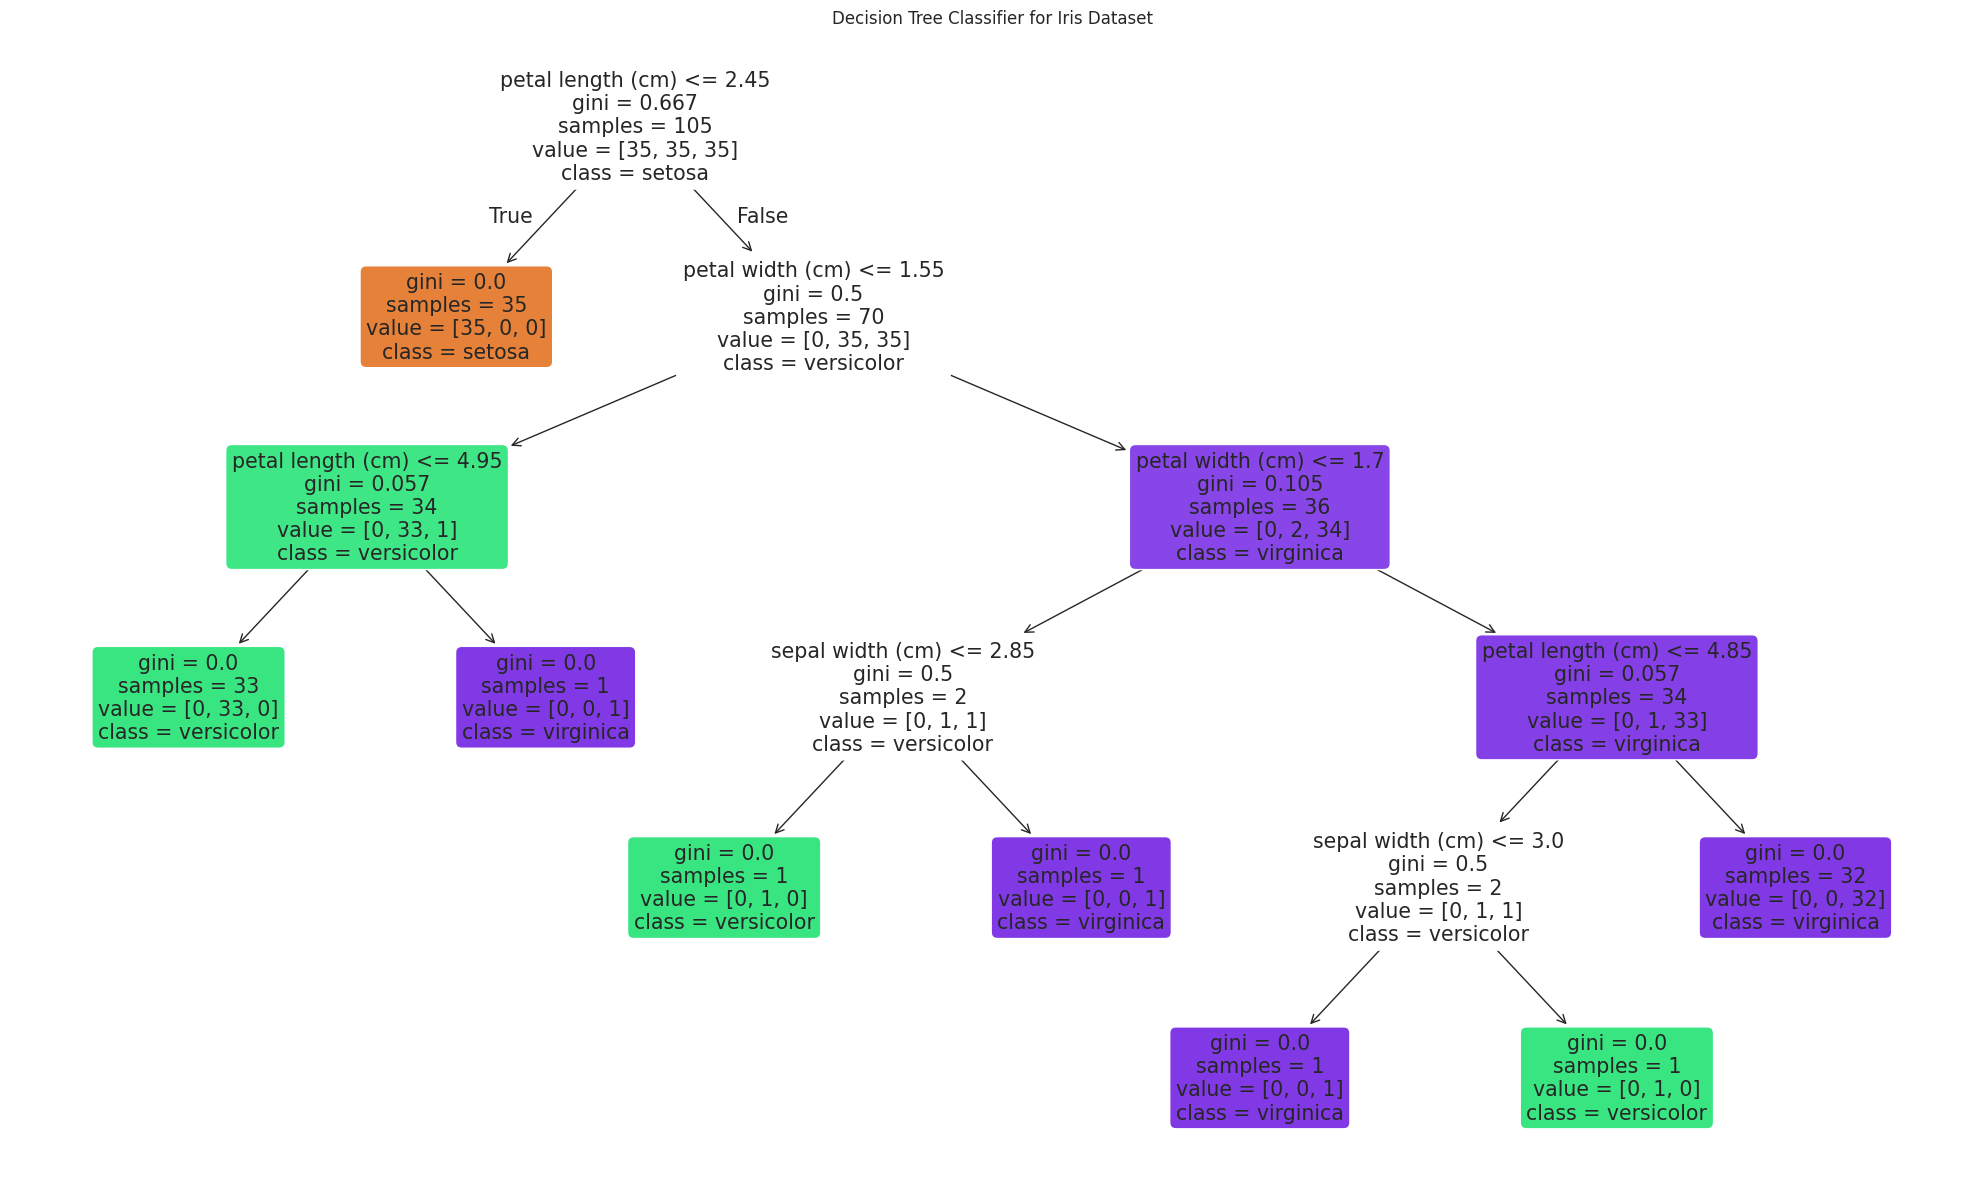

In [37]:
# Visualize the decision tree
plt.figure(figsize=(20, 12))
tree.plot_tree(dt_clf, feature_names=iris.feature_names,
               class_names=iris.target_names, filled=True,
               rounded=True)
plt.title('Decision Tree Classifier for Iris Dataset')
plt.tight_layout()
plt.show()

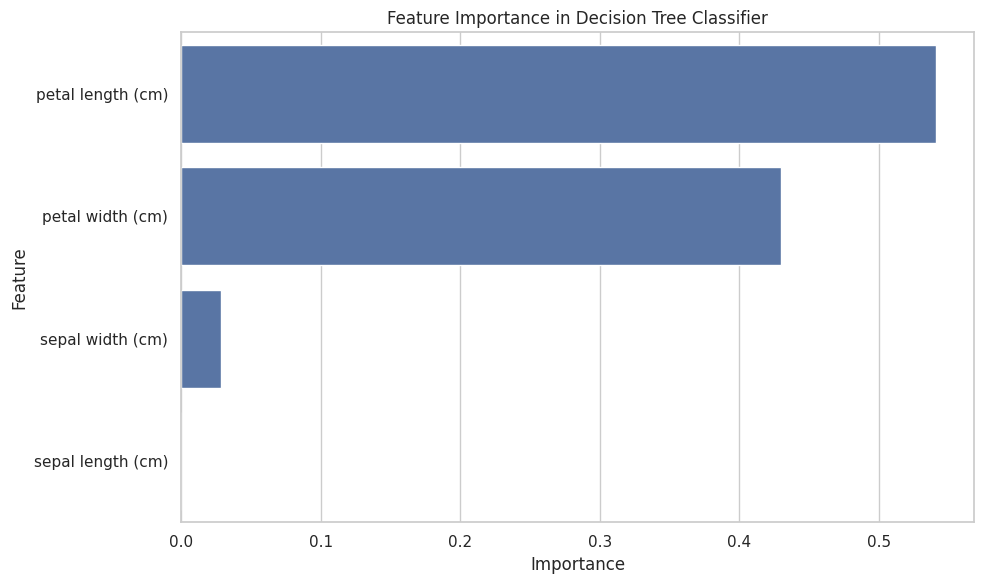

In [38]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': dt_clf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Decision Tree Classifier')
plt.tight_layout()
plt.show()

In [39]:
print("\nFeature Importance:")
display(feature_importance)


Feature Importance:


,Feature,Importance
2,petal length (cm),0.541176
3,petal width (cm),0.430252
1,sepal width (cm),0.028571
0,sepal length (cm),0.000000


### 1.4 Hyperparameter Tuning and Evaluation

In [40]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [41]:
# Perform grid search
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_cls_train, y_cls_train)

# Get best parameters
print("\nBest Parameters:")
print(grid_search.best_params_)


Best Parameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [42]:
# Create a model with the best parameters
best_dt_clf = grid_search.best_estimator_

# Make predictions with the optimized model
best_y_cls_pred = best_dt_clf.predict(X_cls_test)

# Evaluate the optimized model
best_cls_accuracy = accuracy_score(y_cls_test, best_y_cls_pred)
print(f"\nOptimized Classification Accuracy: {best_cls_accuracy:.4f}")

print("\nOptimized Classification Report:")
best_cls_report = classification_report(y_cls_test, best_y_cls_pred, target_names=iris.target_names)
print(best_cls_report)


Optimized Classification Accuracy: 0.9333

Optimized Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



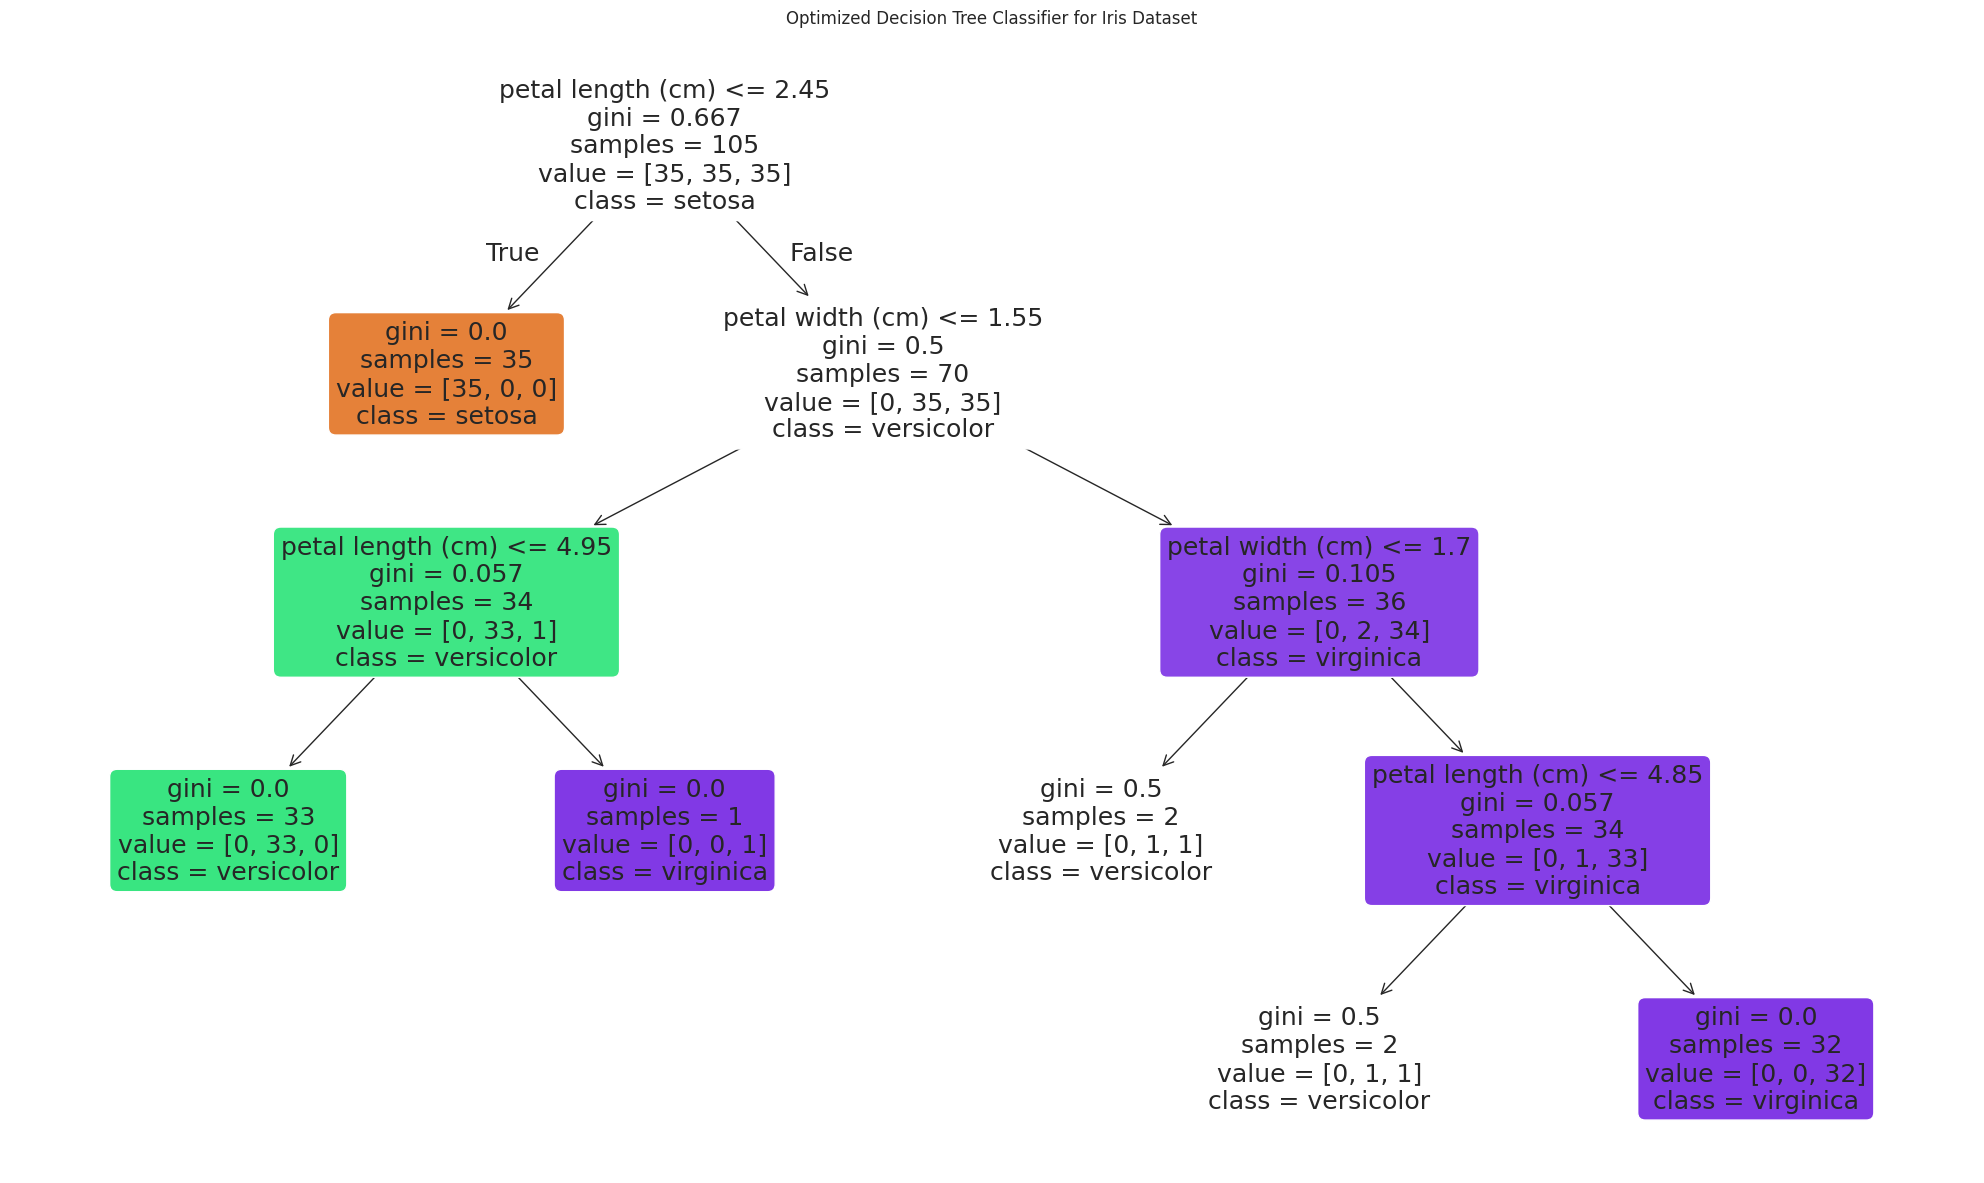

In [43]:
# Visualize the optimized decision tree
plt.figure(figsize=(20, 12))
tree.plot_tree(best_dt_clf, feature_names=iris.feature_names,
               class_names=iris.target_names, filled=True,
               rounded=True)
plt.title('Optimized Decision Tree Classifier for Iris Dataset')
plt.tight_layout()
plt.show()

## 2. Regression with Decision Trees

### 2.1 Data Preparation and Exploration

In [44]:
# Load the California Housing dataset
housing = fetch_california_housing()
X_reg = pd.DataFrame(housing.data, columns=housing.feature_names)
y_reg = pd.Series(housing.target, name='median_house_value')

# Display basic dataset information
print("\n--- Regression Dataset: California Housing ---")
print(f"Dataset shape: {X_reg.shape}")
print(f"Features: {', '.join(housing.feature_names)}")
print(f"Target: Median house value (in $100,000s)")


--- Regression Dataset: California Housing ---
Dataset shape: (20640, 8)
Features: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
Target: Median house value (in $100,000s)


In [45]:
# Explore the dataset
print("\nData Sample:")
display(pd.concat([X_reg, y_reg], axis=1).head())

print("\nFeature Statistics:")
display(X_reg.describe())

print("\nTarget Statistics:")
display(y_reg.describe())


Data Sample:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Feature Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000



Target Statistics:


,median_house_value
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


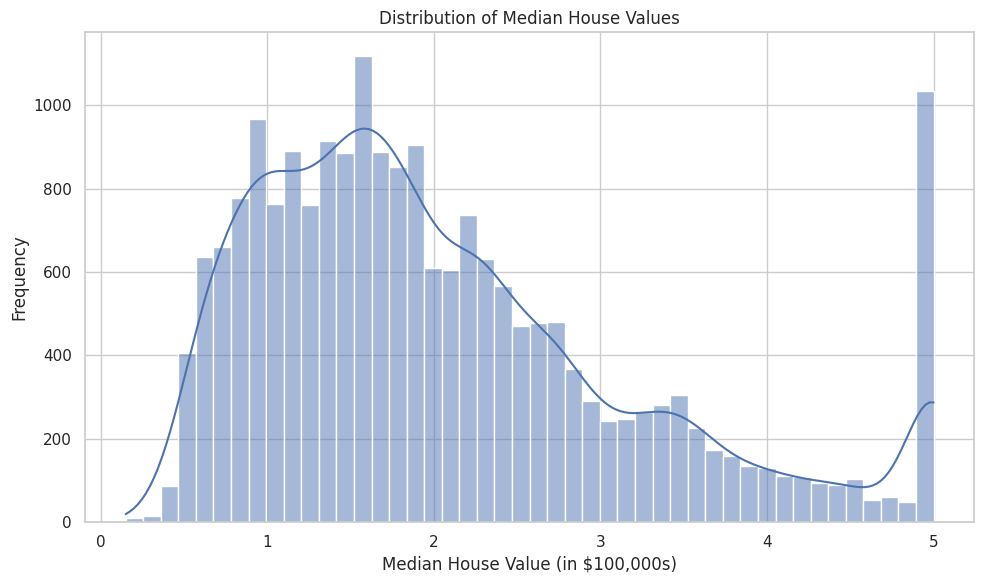

In [46]:
# Visualize target distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_reg, kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

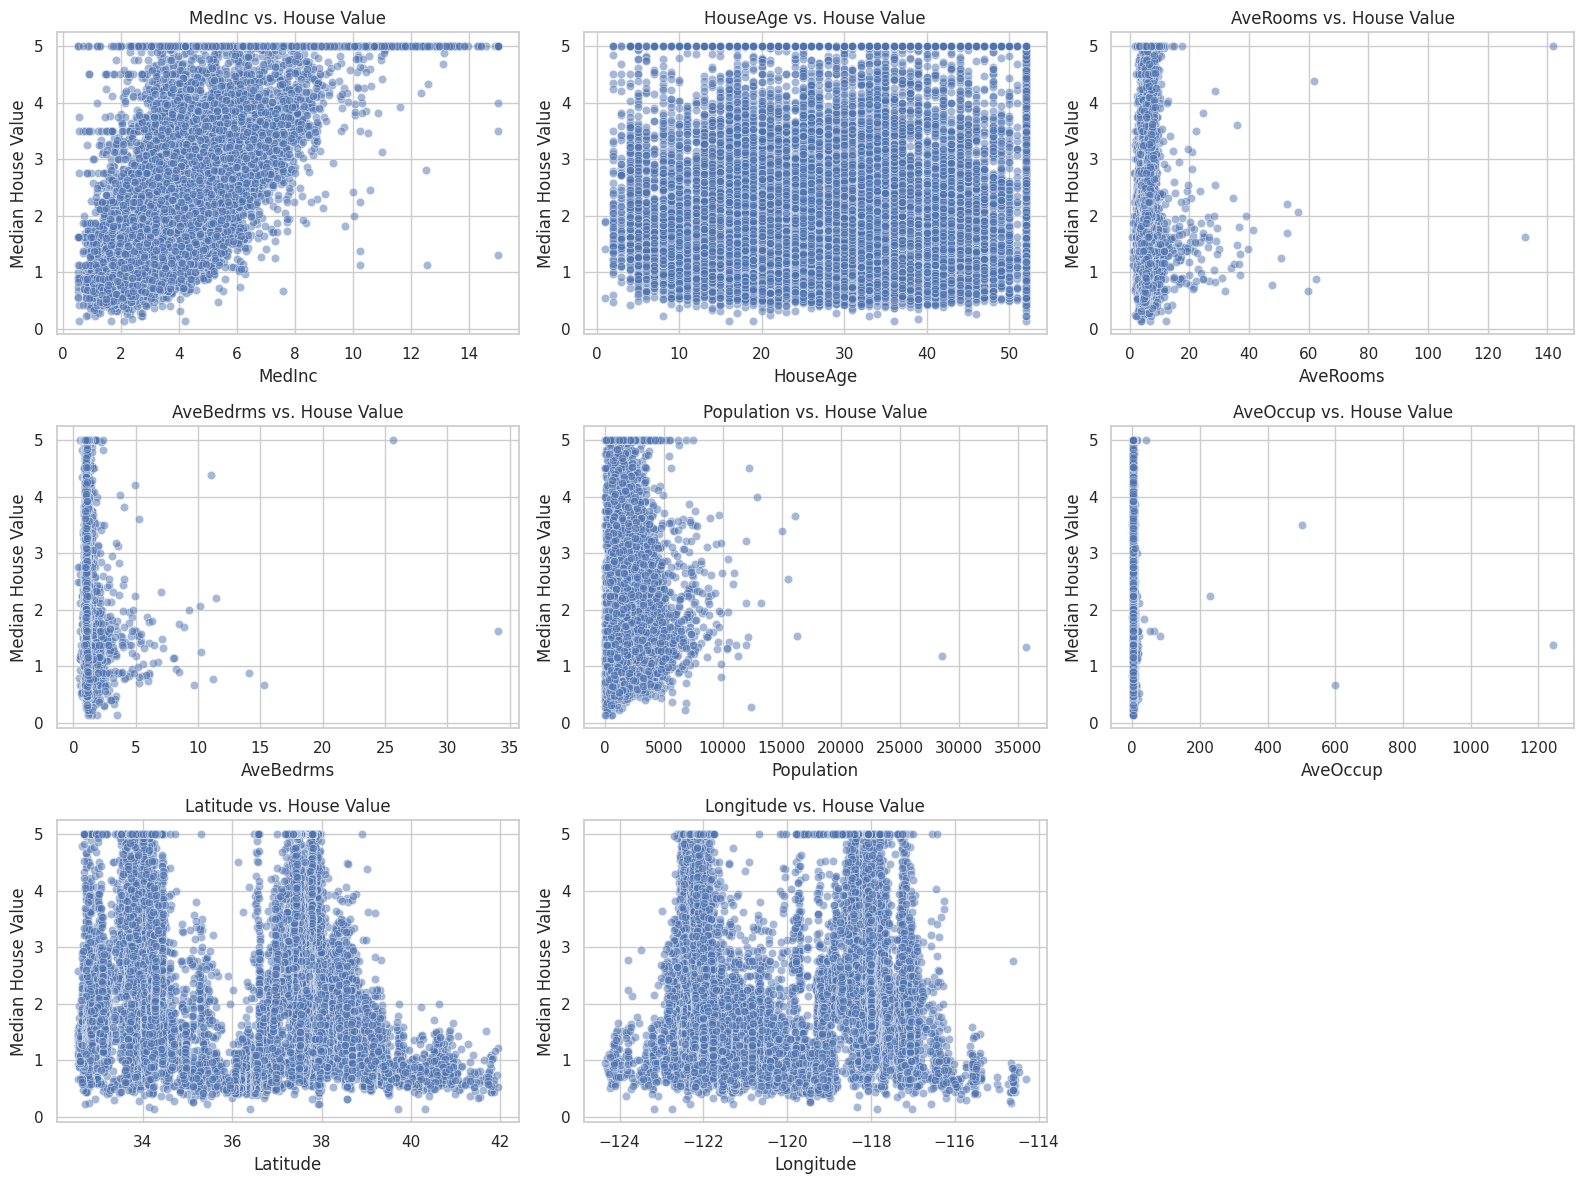

In [47]:
# Visualize relationships between features and target
plt.figure(figsize=(16, 12))
for i, feature in enumerate(housing.feature_names):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=X_reg[feature], y=y_reg, alpha=0.5)
    plt.title(f'{feature} vs. House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
plt.tight_layout()
plt.show()

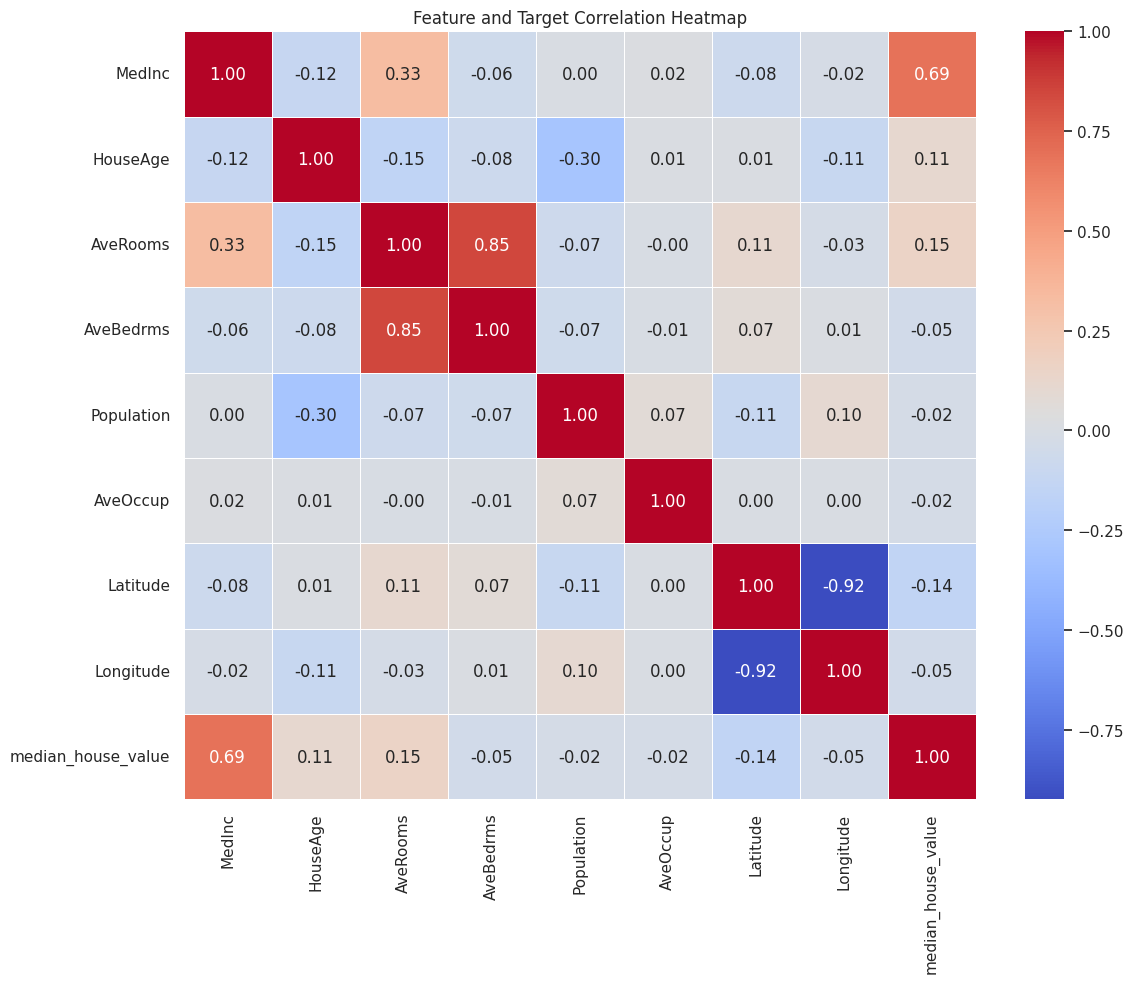

In [48]:
# Correlation heatmap with target
plt.figure(figsize=(12, 10))
correlation_data = pd.concat([X_reg, y_reg], axis=1)
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Feature and Target Correlation Heatmap')
plt.tight_layout()
plt.show()

In [49]:
# Scale the features for better visualization
scaler = StandardScaler()
X_reg_scaled = pd.DataFrame(
    scaler.fit_transform(X_reg),
    columns=X_reg.columns
)

# Split the data into training and testing sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

print(f"\nTraining set shape: {X_reg_train.shape}")
print(f"Testing set shape: {X_reg_test.shape}")


Training set shape: (14448, 8)
Testing set shape: (6192, 8)


### 1.2 Model Training

In [50]:
# Create and train a decision tree regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_reg_train, y_reg_train)

# Make predictions
y_reg_pred = dt_reg.predict(X_reg_test)

# Evaluate the model
reg_mse = mean_squared_error(y_reg_test, y_reg_pred)
reg_rmse = np.sqrt(reg_mse)
reg_mae = mean_absolute_error(y_reg_test, y_reg_pred)
reg_r2 = r2_score(y_reg_test, y_reg_pred)

print("\nRegression Model Evaluation:")
print(f"Mean Squared Error (MSE): {reg_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {reg_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {reg_mae:.4f}")
print(f"R² Score: {reg_r2:.4f}")


Regression Model Evaluation:
Mean Squared Error (MSE): 0.5280
Root Mean Squared Error (RMSE): 0.7266
Mean Absolute Error (MAE): 0.4690
R² Score: 0.5977


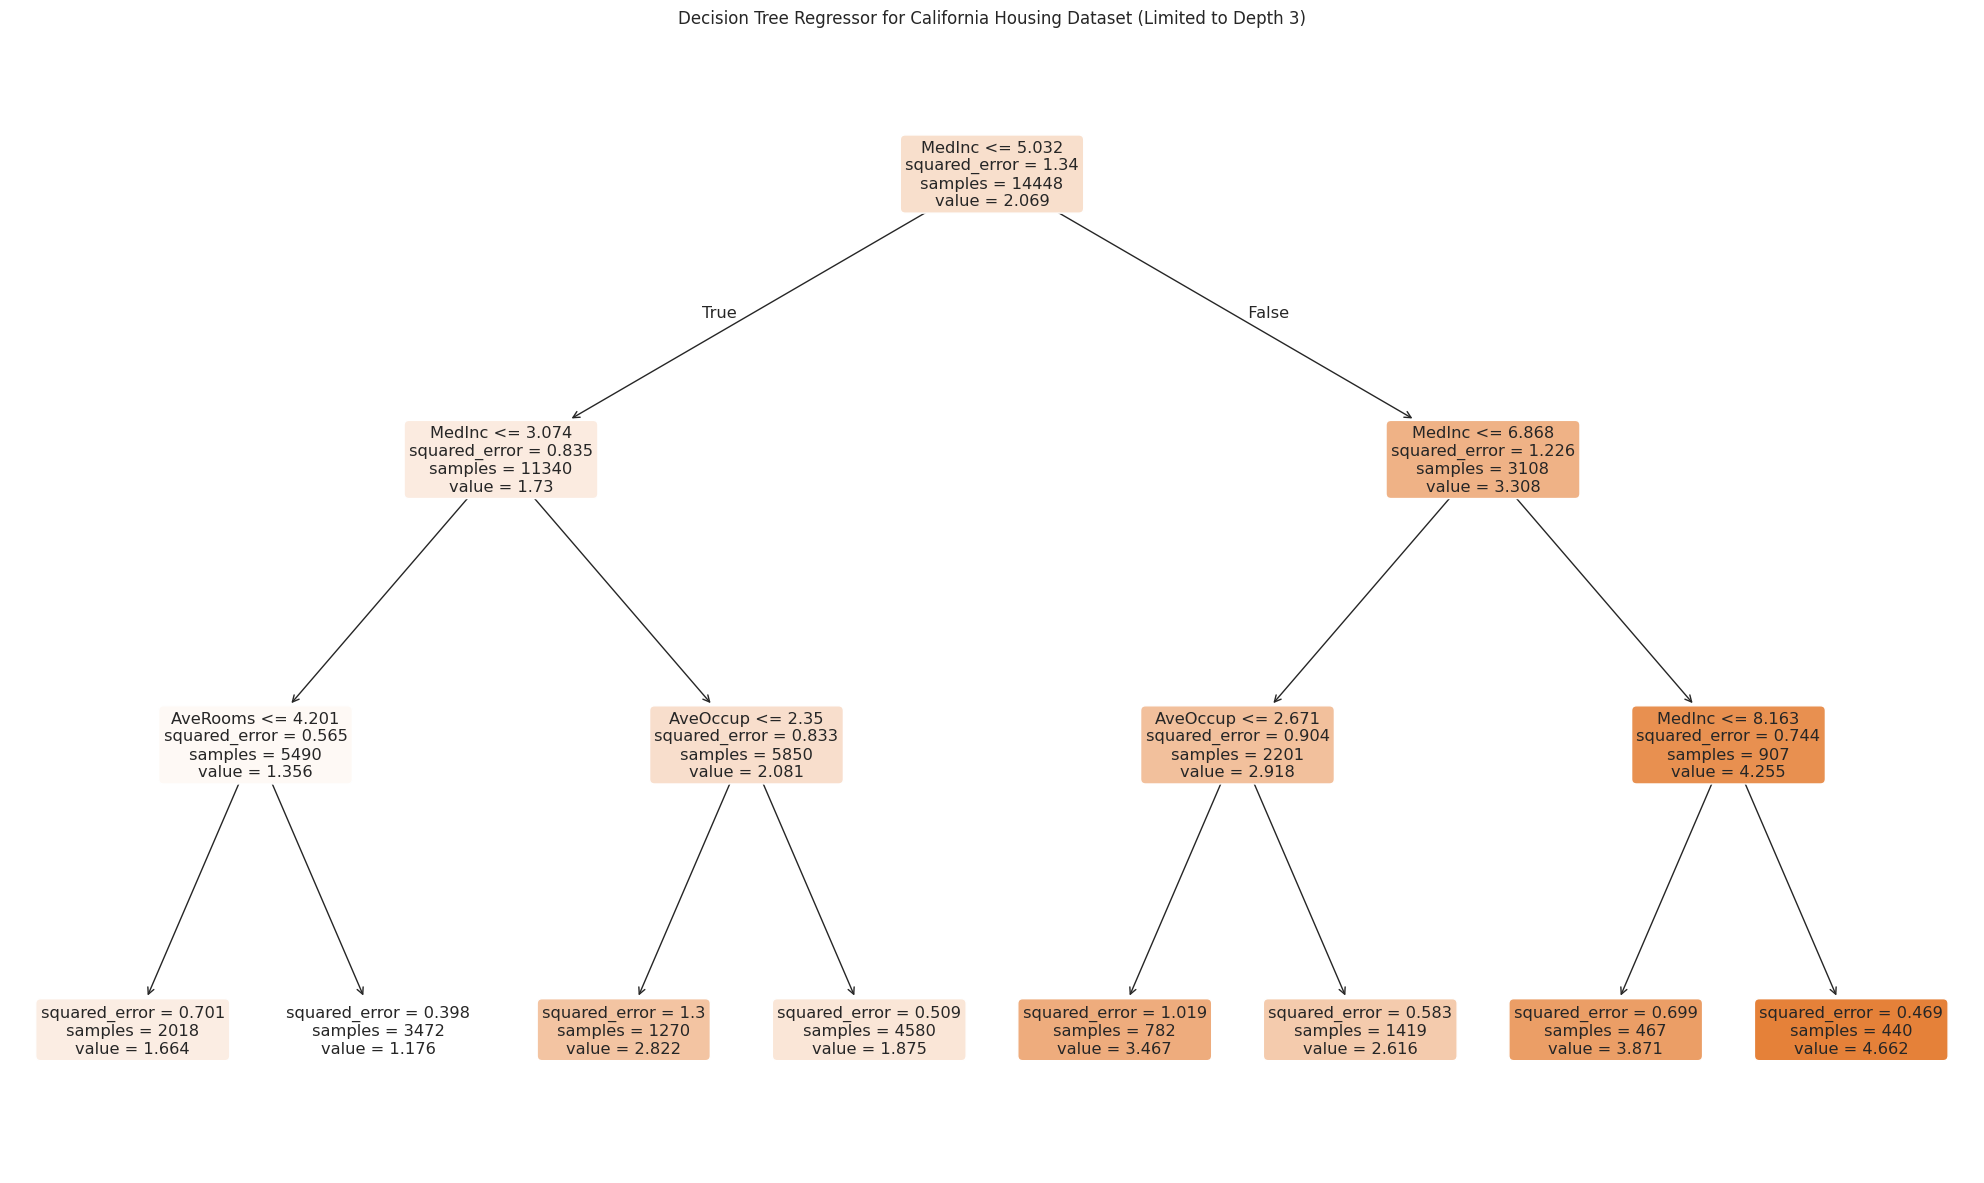

In [51]:
# Visualize the decision tree (limit depth for clarity)
plt.figure(figsize=(20, 12))
tree.plot_tree(
    DecisionTreeRegressor(random_state=42, max_depth=3).fit(X_reg_train, y_reg_train),
    feature_names=housing.feature_names,
    filled=True,
    rounded=True
)
plt.title('Decision Tree Regressor for California Housing Dataset (Limited to Depth 3)')
plt.tight_layout()
plt.show()

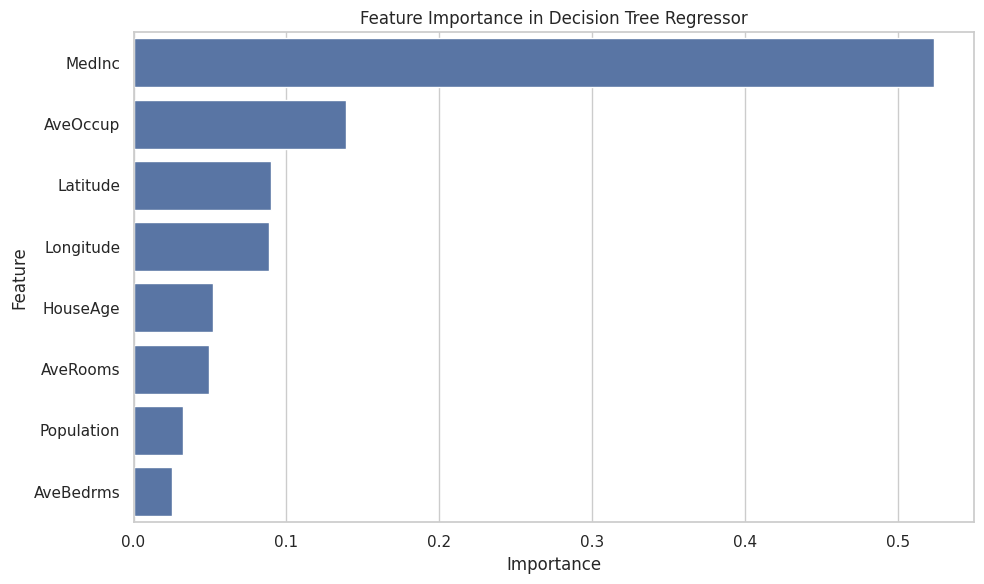

In [52]:
# Feature importance
reg_feature_importance = pd.DataFrame({
    'Feature': housing.feature_names,
    'Importance': dt_reg.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=reg_feature_importance)
plt.title('Feature Importance in Decision Tree Regressor')
plt.tight_layout()
plt.show()

In [53]:
print("\nFeature Importance for Regression Model:")
display(reg_feature_importance)


Feature Importance for Regression Model:


,Feature,Importance
0,MedInc,0.523456
5,AveOccup,0.139012
6,Latitude,0.089992
7,Longitude,0.088806
1,HouseAge,0.052135
2,AveRooms,0.049418
4,Population,0.032206
3,AveBedrms,0.024974


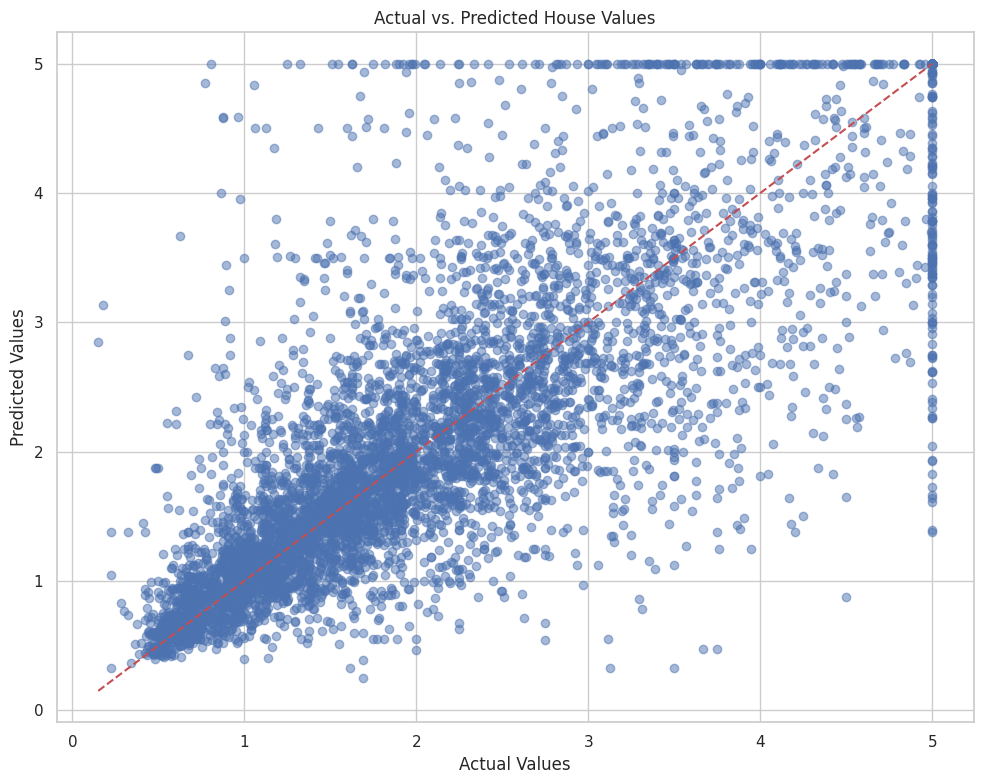

In [54]:
# Predicted vs. Actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted House Values')
plt.tight_layout()
plt.show()

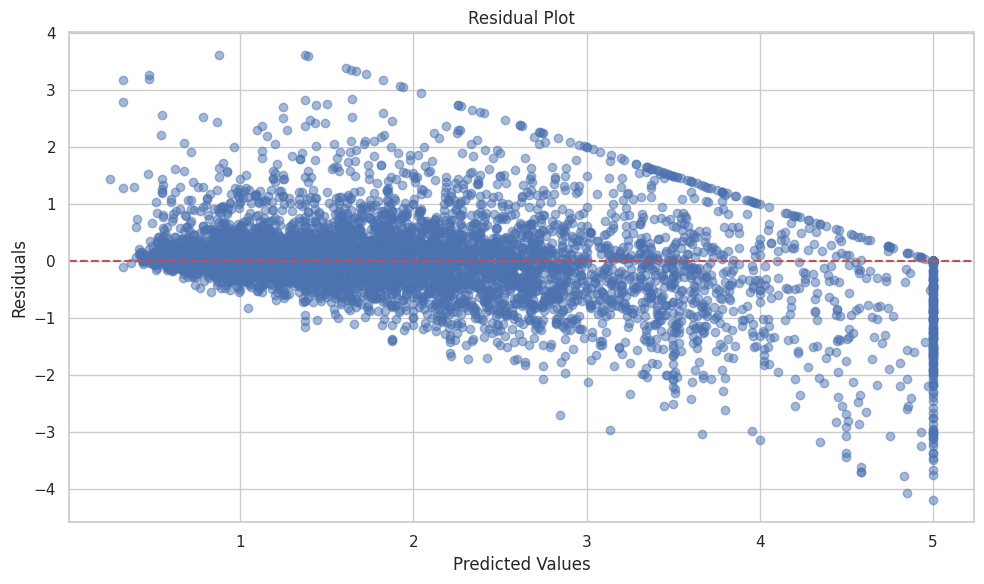

In [55]:
# Residual plot
residuals = y_reg_test - y_reg_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_reg_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

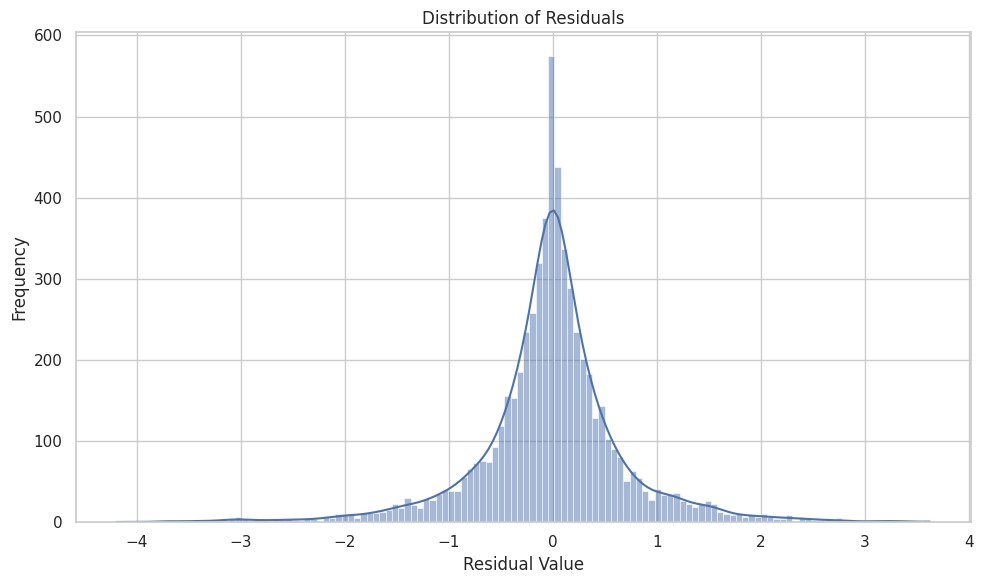

In [56]:
# Residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### 2.4 Hyperparameter Tuning and Evaluation

In [ ]:
# Define hyperparameter grid for regression
reg_param_grid = {
    'max_depth': [1, 2, 3],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

# Perform grid search
reg_grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=reg_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

reg_grid_search.fit(X_reg_train, y_reg_train)

# Get best parameters
print("\nBest Parameters for Regression Model:")
print(reg_grid_search.best_params_)


Best Parameters for Regression Model:
{'criterion': 'poisson', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [20]:
# Create a model with the best parameters
best_dt_reg = reg_grid_search.best_estimator_

# Make predictions with the optimized model
best_y_reg_pred = best_dt_reg.predict(X_reg_test)

# Evaluate the optimized model
best_reg_mse = mean_squared_error(y_reg_test, best_y_reg_pred)
best_reg_rmse = np.sqrt(best_reg_mse)
best_reg_mae = mean_absolute_error(y_reg_test, best_y_reg_pred)
best_reg_r2 = r2_score(y_reg_test, best_y_reg_pred)

print("\nOptimized Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {best_reg_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {best_reg_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {best_reg_mae:.4f}")
print(f"R² Score: {best_reg_r2:.4f}")


Optimized Regression Model Evaluation:
Mean Squared Error (MSE): 0.6157
Root Mean Squared Error (RMSE): 0.7847
Mean Absolute Error (MAE): 0.5876
R² Score: 0.5309


In [21]:
# Compare base model vs optimized model
model_comparison = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Base Model': [reg_mse, reg_rmse, reg_mae, reg_r2],
    'Optimized Model': [best_reg_mse, best_reg_rmse, best_reg_mae, best_reg_r2]
})

print("\nModel Comparison:")
display(model_comparison)


Model Comparison:


,Metric,Base Model,Optimized Model
0,MSE,0.528010,0.615750
1,RMSE,0.726643,0.784697
2,MAE,0.469048,0.587610
3,R²,0.597719,0.530872


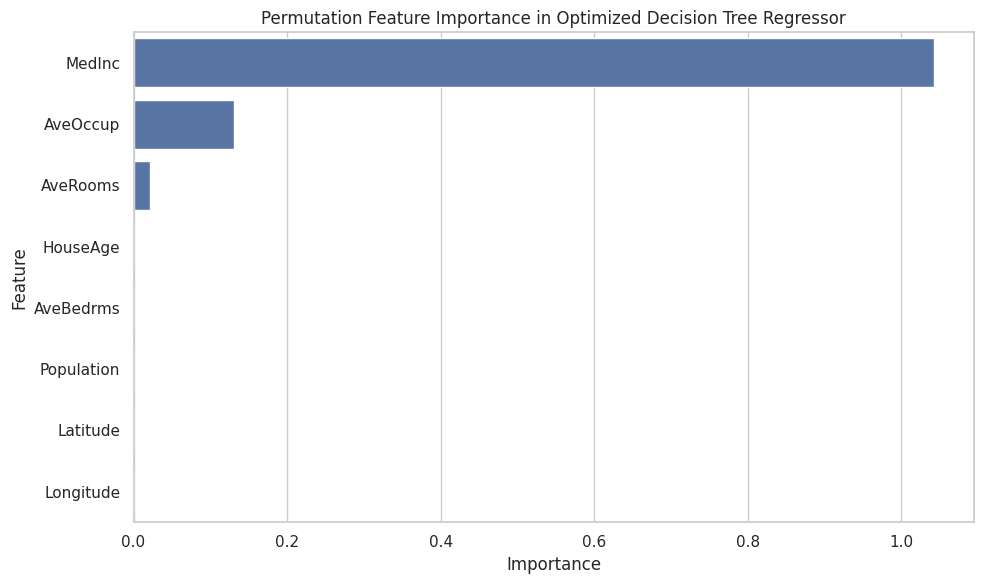

In [22]:
# Permutation feature importance for the optimized regression model
reg_perm_importance = permutation_importance(best_dt_reg, X_reg_test, y_reg_test, n_repeats=10, random_state=42)
reg_perm_importance_df = pd.DataFrame({
    'Feature': housing.feature_names,
    'Importance': reg_perm_importance.importances_mean
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=reg_perm_importance_df)
plt.title('Permutation Feature Importance in Optimized Decision Tree Regressor')
plt.tight_layout()
plt.show()

In [23]:
print("\nPermutation Feature Importance for Optimized Regression Model:")
display(reg_perm_importance_df)


Permutation Feature Importance for Optimized Regression Model:


,Feature,Importance
0,MedInc,1.042369
5,AveOccup,0.130404
2,AveRooms,0.020874
1,HouseAge,0.000000
3,AveBedrms,0.000000
4,Population,0.000000
6,Latitude,0.000000
7,Longitude,0.000000


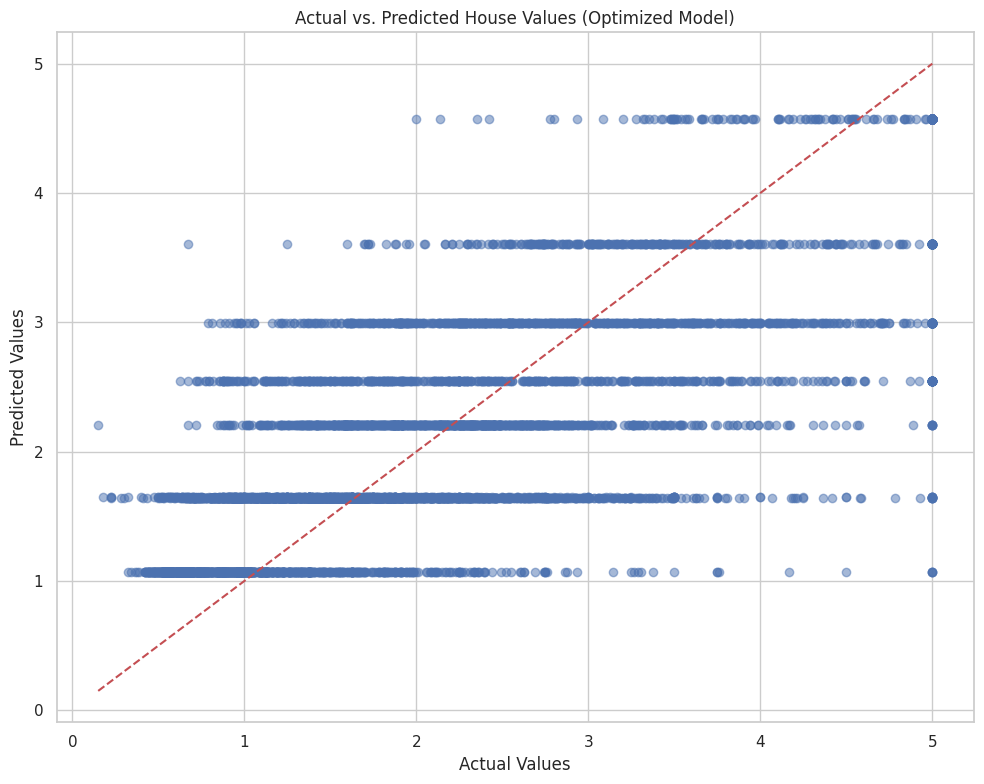

In [24]:
# Predicted vs. Actual values for optimized model
plt.figure(figsize=(10, 8))
plt.scatter(y_reg_test, best_y_reg_pred, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted House Values (Optimized Model)')
plt.tight_layout()
plt.show()

## 3. Conclusion

In [ ]:
print("\n--- Decision Trees Analysis Summary ---")
print("\nClassification Task:")
print(f"- Base model accuracy: {cls_accuracy:.4f}")
print(f"- Optimized model accuracy: {best_cls_accuracy:.4f}")
print(f"- Most important features: {', '.join(feature_importance['Feature'].iloc[:2])}")
print("\nRegression Task:")
print(f"- Base model R² score: {reg_r2:.4f}")
print(f"- Optimized model R² score: {best_reg_r2:.4f}")
print(f"- Most important features: {', '.join(reg_feature_importance['Feature'].iloc[:2])}")
print("\nKey Insights:")
print("- Decision trees are versatile algorithms suitable for both classification and regression tasks")
print("- Hyperparameter tuning significantly improves model performance")
print("- Feature importance analysis helps identify the most influential predictors")
print("- Decision trees can be visualized for better interpretability")